In [46]:
import numpy as np
import matplotlib.pyplot as plt

import hepunits.units as u
import hepunits.constants as c

plt.rcParams.update({'font.size': 12})

In [47]:
c.c_light/(u.meter/u.second)

299792458.0

In [48]:
class Cherenkov:
    def __init__(self):
        self.n = 1.33 # refractive index. dimensionless.
        self.beta=0.99 # speed of charged particle in medium, dimensionless.
        self.E = 1*u.GeV # total energy
        self.m0 = 105.7*u.MeV/c.c_light_sq # rest mass
        self.z=1 # charge number. ex. alpha is 2, electron/muon is 1.
        self._alpha=1/137 # fine structure
        
    def calc_beta(self):
        E0 = self.m0*c.c_light_sq
        beta_sq = 1-np.square(E0/self.E)
        return np.sqrt(beta_sq)
        
    def calc_dNdxdl(self, lam):
        """
        lam: float or 1d array. Vaccume wavelength.
        """
        n=self.n
        beta=self.beta
        a=self._alpha
        z=self.z
        return c.two_pi*a*np.square(z)/np.square(lam)*(1-1/np.square(beta*n))
        

In [49]:
ch = Cherenkov()
ch.m0 = 105.7*u.MeV/c.c_light_sq


lam = np.linspace(200, 900, 701)*u.nanometer
lam_nm = lam/u.nanometer


200.0 MeV Nph>300 nm:  163.41381545149778
300.0 MeV Nph>300 nm:  268.7591742487341
500.0 MeV Nph>300 nm:  309.44921883103086
1.0 GeV Nph>300 nm:  324.6542289808711


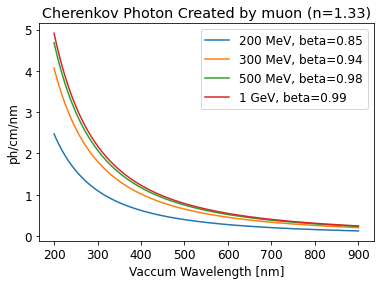

In [57]:
plt.figure()

# visble photon
mask = (lam_nm>300) & (lam_nm<600)


ch.E = 0.2*u.GeV
ch.beta=ch.calc_beta()
dNdl = ch.calc_dNdxdl(lam)*(1*u.centimeter)
dNdl_nm = dNdl/(1/u.nanometer)
plt.plot(lam_nm, dNdl_nm, label='%d MeV, beta=%.2f' % (ch.E/u.MeV, ch.beta))
print(ch.E/u.MeV, 'MeV Nph>300 nm: ', np.trapz(dNdl_nm[mask], lam_nm[mask]))

ch.E = 0.3*u.GeV
ch.beta=ch.calc_beta()
dNdl = ch.calc_dNdxdl(lam)*(1*u.centimeter)
dNdl_nm = dNdl/(1/u.nanometer)
plt.plot(lam_nm, dNdl_nm, label='%d MeV, beta=%.2f' % (ch.E/u.MeV, ch.beta))
print(ch.E/u.MeV, 'MeV Nph>300 nm: ', np.trapz(dNdl_nm[mask], lam_nm[mask]))

ch.E = 0.5*u.GeV
ch.beta=ch.calc_beta()
dNdl = ch.calc_dNdxdl(lam)*(1*u.centimeter)
dNdl_nm = dNdl/(1/u.nanometer)
plt.plot(lam_nm, dNdl_nm, label='%d MeV, beta=%.2f' % (ch.E/u.MeV, ch.beta))
print(ch.E/u.MeV, 'MeV Nph>300 nm: ', np.trapz(dNdl_nm[mask], lam_nm[mask]))

ch.E = 1*u.GeV
ch.beta=ch.calc_beta()
dNdl = ch.calc_dNdxdl(lam)*(1*u.centimeter)
dNdl_nm = dNdl/(1/u.nanometer)
plt.plot(lam_nm, dNdl_nm, label='%d GeV, beta=%.2f' % (ch.E/u.GeV, ch.beta))
print(ch.E/u.GeV, 'GeV Nph>300 nm: ', np.trapz(dNdl_nm[mask], lam_nm[mask]))

plt.title("Cherenkov Photon Created by muon (n=1.33)")
plt.xlabel('Vaccum Wavelength [nm]')
plt.ylabel('ph/cm/nm')
plt.legend()
plt.show()